___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# KNN Project Exercise 

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Complete the Tasks in bold

**TASK: Run the cells below to load the data.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/sonar.all-data.csv')

In [3]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
Freq_1,0.02,0.0453,0.0262,0.01,0.0762,0.0286,0.0317,0.0519,0.0223,0.0164,...,0.0238,0.0116,0.0131,0.0335,0.0272,0.0187,0.0323,0.0522,0.0303,0.026
Freq_2,0.0371,0.0523,0.0582,0.0171,0.0666,0.0453,0.0956,0.0548,0.0375,0.0173,...,0.0318,0.0744,0.0387,0.0258,0.0378,0.0346,0.0101,0.0437,0.0353,0.0363
Freq_3,0.0428,0.0843,0.1099,0.0623,0.0481,0.0277,0.1321,0.0842,0.0484,0.0347,...,0.0422,0.0367,0.0329,0.0398,0.0488,0.0168,0.0298,0.018,0.049,0.0136
Freq_4,0.0207,0.0689,0.1083,0.0205,0.0394,0.0174,0.1408,0.0319,0.0475,0.007,...,0.0399,0.0225,0.0078,0.057,0.0848,0.0177,0.0564,0.0292,0.0608,0.0272
Freq_5,0.0954,0.1183,0.0974,0.0205,0.059,0.0384,0.1674,0.1158,0.0647,0.0187,...,0.0788,0.0076,0.0721,0.0529,0.1127,0.0393,0.076,0.0351,0.0167,0.0214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Freq_57,0.018,0.014,0.0316,0.005,0.0072,0.0057,0.0092,0.0085,0.0065,0.0032,...,0.0028,0.0037,0.004,0.0045,0.0054,0.0065,0.0034,0.014,0.0034,0.004
Freq_58,0.0084,0.0049,0.0164,0.0044,0.0048,0.0027,0.0143,0.0047,0.0093,0.0035,...,0.0013,0.0044,0.0009,0.0022,0.0051,0.0115,0.0032,0.0138,0.0079,0.0036
Freq_59,0.009,0.0052,0.0095,0.004,0.0107,0.0051,0.0036,0.0048,0.0059,0.0056,...,0.0035,0.0057,0.0015,0.0005,0.0065,0.0193,0.0062,0.0077,0.0036,0.0061
Freq_60,0.0032,0.0044,0.0078,0.0117,0.0094,0.0062,0.0103,0.0053,0.0022,0.004,...,0.006,0.0035,0.0085,0.0031,0.0103,0.0157,0.0067,0.0031,0.0048,0.0115


In [4]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Data Exploration

**TASK: Create a heatmap of the correlation between the difference frequency responses.**

C:\Users\adeeb\AppData\Local\Temp\ipykernel_9188\2790758157.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

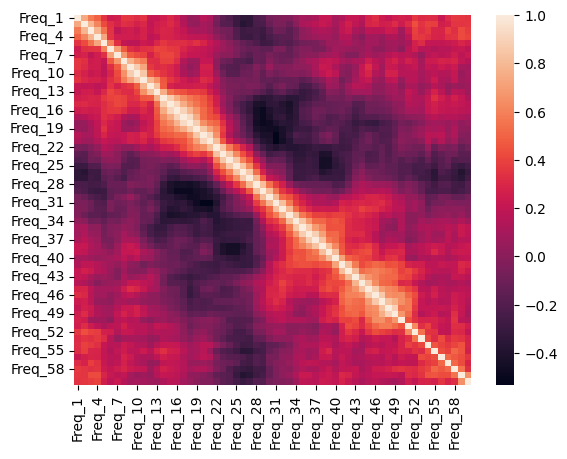

In [5]:
# CODE HERE
sns.heatmap(df.corr())

<AxesSubplot:>

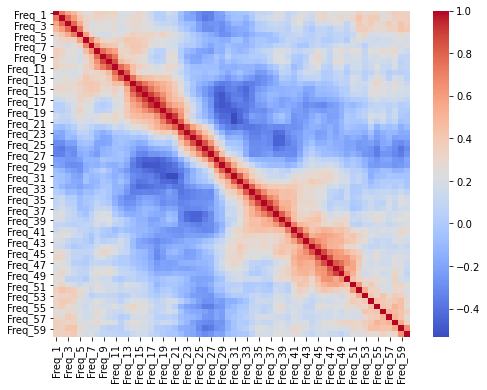

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [9]:
#CODE HERE
# df.corr().head()
# df.sort_values(by=df.corr())
df['target']=df['Label'].map({'R':0,'M':1})

In [16]:
np.abs(df.corr()['target'].sort_values()).tail()

C:\Users\adeeb\AppData\Local\Temp\ipykernel_9188\3919539.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.abs(df.corr()['target'].sort_values()).tail()


Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
target     1.000000
Name: target, dtype: float64

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: The solution uses a random_state=42*

In [22]:
# CODE HERE
from sklearn.model_selection import train_test_split
# help(train_test_split)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, ra ndom_state=42)
X = df.drop(['target','Label'],axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [30]:
# CODE HERE
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
operation=[('scaler',scaler),('knn',knn)]
from sklearn.pipeline import Pipeline
pipe=Pipeline(operation)

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [33]:
# CODE HERE
from sklearn.model_selection import GridSearchCV
k_values=list(range(1,30))
param_grid={"knn__n_neighbors":k_values}

In [34]:
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [35]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [38]:
y_pred=full_cv_classifier.predict(X_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [39]:
#CODE HERE
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

<Axes: >

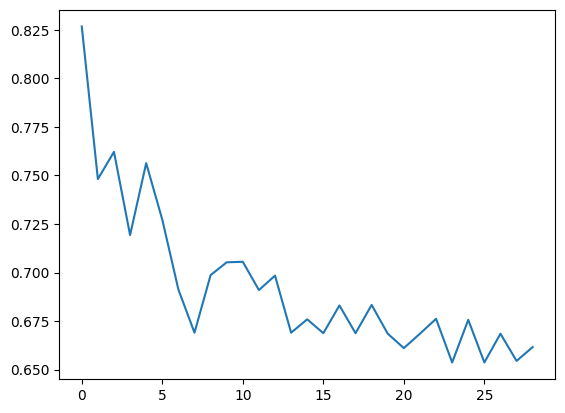

In [42]:
pd.DataFrame(full_cv_classifier.cv_results_)['mean_test_score'].plot()

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

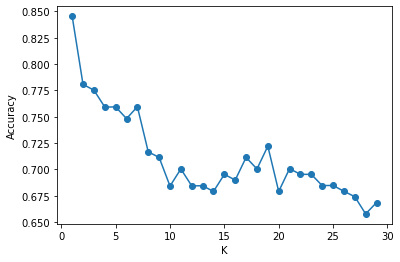

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [46]:
#Code Here
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
confusion_matrix(y_pred,y_test)

array([[34,  3],
       [ 4, 28]], dtype=int64)

In [45]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           M       0.89      0.92      0.91        37
           R       0.90      0.88      0.89        32

    accuracy                           0.90        69
   macro avg       0.90      0.90      0.90        69
weighted avg       0.90      0.90      0.90        69



array([[12,  1],
       [ 1,  7]], dtype=int64)

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



### Great Job!